# Cambiando -99.0 a None

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import glob, os
import datetime
import matplotlib.pyplot as plt

In [2]:
## Importando los datos para PM10
path = r'C:\Users\luisf\Documents\Python Projects\datamex1019\air-quality-cdmx\data_aircdmx'                     # use your path
all_files = glob.glob(os.path.join(path, "*PM10.xls"))     # advisable to use os.path.join as this makes concatenation OS independent
all_files

['C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2000PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2001PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2002PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2003PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2004PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2005PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2006PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2007PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2008PM10.xls',
 'C:\\Users\\luisf\\Document

In [3]:
df_from_each_file = (pd.read_excel(f) for f in all_files)
df_from_each_file
concatenated_df=pd.concat([i.set_index(['FECHA']+['HORA']) for i in df_from_each_file]).reset_index()

In [4]:
#Filtrando por las alcaldías dentro del alcance
df=concatenated_df[["FECHA","HORA","BJU","HGM","MGH"]]

In [6]:
df.HORA[df.HORA==24]

23        24
47        24
71        24
95        24
119       24
143       24
167       24
191       24
215       24
239       24
263       24
287       24
311       24
335       24
359       24
383       24
407       24
431       24
455       24
479       24
503       24
527       24
551       24
575       24
599       24
623       24
647       24
671       24
695       24
719       24
          ..
173159    24
173183    24
173207    24
173231    24
173255    24
173279    24
173303    24
173327    24
173351    24
173375    24
173399    24
173423    24
173447    24
173471    24
173495    24
173519    24
173543    24
173567    24
173591    24
173615    24
173639    24
173663    24
173687    24
173711    24
173735    24
173759    24
173783    24
173807    24
173831    24
173855    24
Name: HORA, Length: 7244, dtype: int64

In [8]:
df.HORA[df.HORA==24] = 00
df.FECHA=df.FECHA.apply(str)
df.FECHA=df.FECHA.apply(lambda x: x.replace(' 00:00:00',''))
df['DATETIME']=df.FECHA + ' ' + df.HORA.apply(str)+':00:00'
#df.DATETIME=df.DATETIME.apply(lambda x: x.replace(' 00:00:00',''))
df.DATETIME=pd.to_datetime(df.DATETIME)
df.DATETIME.head()

0   2000-01-01 01:00:00
1   2000-01-01 02:00:00
2   2000-01-01 03:00:00
3   2000-01-01 04:00:00
4   2000-01-01 05:00:00
Name: DATETIME, dtype: datetime64[ns]

In [9]:
df_benito=df[["DATETIME","FECHA","HORA","BJU"]]
df_cuauh=df[["DATETIME","FECHA","HORA","HGM"]]
df_miguel=df[["DATETIME","FECHA","HORA","MGH"]]

In [10]:
df_benito=df_benito[df_benito.FECHA >= '2015-01-01']
df_cuauh=df_cuauh[df_cuauh.FECHA >= '2012-01-01']
df_miguel=df_miguel[df_miguel.FECHA >= '2015-01-01']

## Miguel

In [ ]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
ax.scatter(df_miguel.DATETIME, df_miguel.MGH, color='r');

In [ ]:
df_miguel[df_miguel.MGH == -99.0] = None

In [ ]:
df_miguel.isnull().sum()

In [ ]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
ax.scatter(df_miguel.DATETIME, df_miguel.MGH, color='r');

In [ ]:
plt.figure(figsize=(4, 8))
df_miguel.boxplot(column = 'MGH');

In [ ]:
plt.figure(figsize=(4, 8))
df_miguel[df_miguel.MGH < 200].boxplot(column = 'MGH');

In [ ]:
df_miguel.to_csv("data_clean/miguel_pm10_clean_v2.csv")

## Cuauh

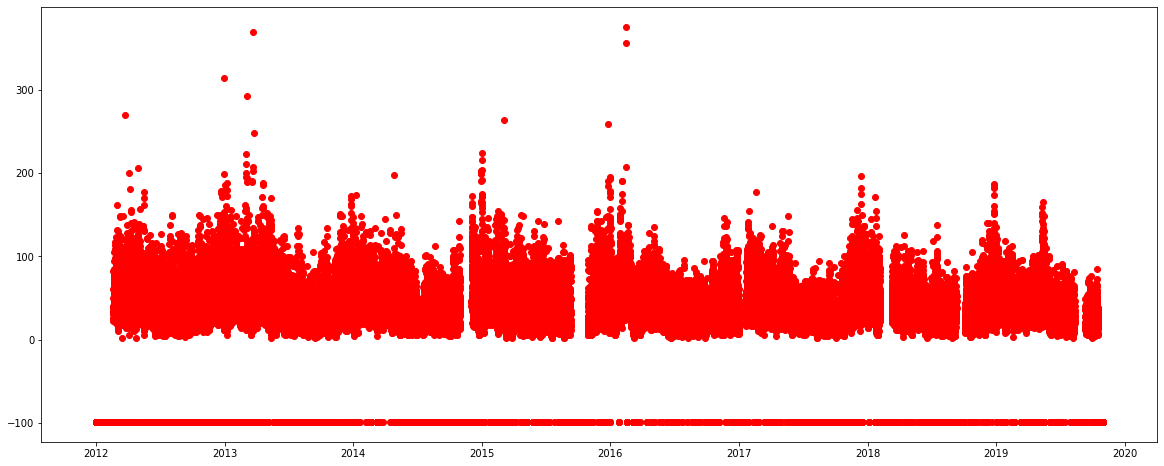

In [11]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
ax.scatter(df_cuauh.DATETIME, df_cuauh.HGM, color='r');

In [12]:
df_cuauh[df_cuauh.HGM == -99.0] = None

In [13]:
df_cuauh.isnull().sum()

DATETIME    11202
FECHA       11202
HORA        11202
HGM         11202
dtype: int64

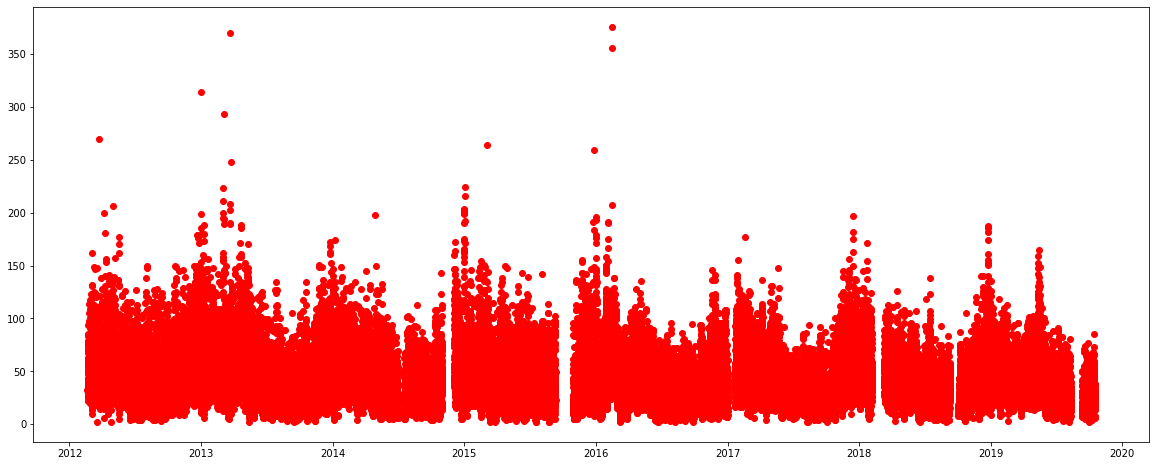

In [14]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
ax.scatter(df_cuauh.DATETIME, df_cuauh.HGM, color='r');

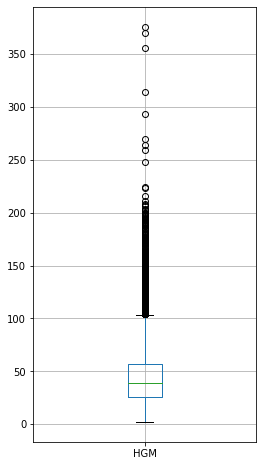

In [16]:
plt.figure(figsize=(4, 8))
df_cuauh.boxplot(column = 'HGM');

In [21]:
#df_cuauh.to_csv("data_clean/cuauh_pm10_clean_v2.csv")

## Benito Juárez